In [28]:
QUANDL_API_KEY = "G_kzspfG2nTnpPxJmy_P"

In [4]:
import os

# So we don't see deprecated warnings... when you're coding it's usually good to leave these!
import warnings
warnings.filterwarnings('ignore')

# Disable logging messages, to make output tidier
import logging
import sys
logging.disable(sys.maxsize)

# For time series and matrix calculations
import pandas as pd
import numpy as np

# To make sure our Matplotlib plots are put inside the notebook
%matplotlib inline

# For plotly
import plotly.offline as py_offline

import plotly.io as pio
pio.renderers.default = "notebook" # larger notebook files, but interactive plots
# pio.renderers.default = "svg"
# pio.renderers.default = "png" # smaller notebook files

# py_offline.init_notebook_mode() # for plotly before 4.0 to ensure plot is published in Jupyter notebook

# Chartpy visualization tools
from chartpy import Chart, Style

# note you might need to create this folder or change it!
raw_data_path = ''

# For downloading market data
import quandl

# Either set API keys as an environment variable (preferred for security reasons) 
# or easier to just replace these below, with your own keys (if you aren't sharing your notebooks)
try:
    QUANDL_API_KEY = os.environ['QUANDL_API_KEY']
    FRED_API_KEY = os.environ['FRED_API_KEY']
    ALPHA_VANTAGE_API_KEY = os.environ['ALPHA_VANTAGE_API_KEY']
    EIKON_API_KEY = os.environ['EIKON_API_KEY']
except:
    pass

from findatapy.market import Market, MarketDataGenerator, MarketDataRequest

# Check if Bloomberg if installed (to check whether to run)
bbg_installed = False

try:
    import blpapi
    bbg_installed = True
except:
    pass

# Define if Eikon is installed (to check whether to run)
eikon_installed = False

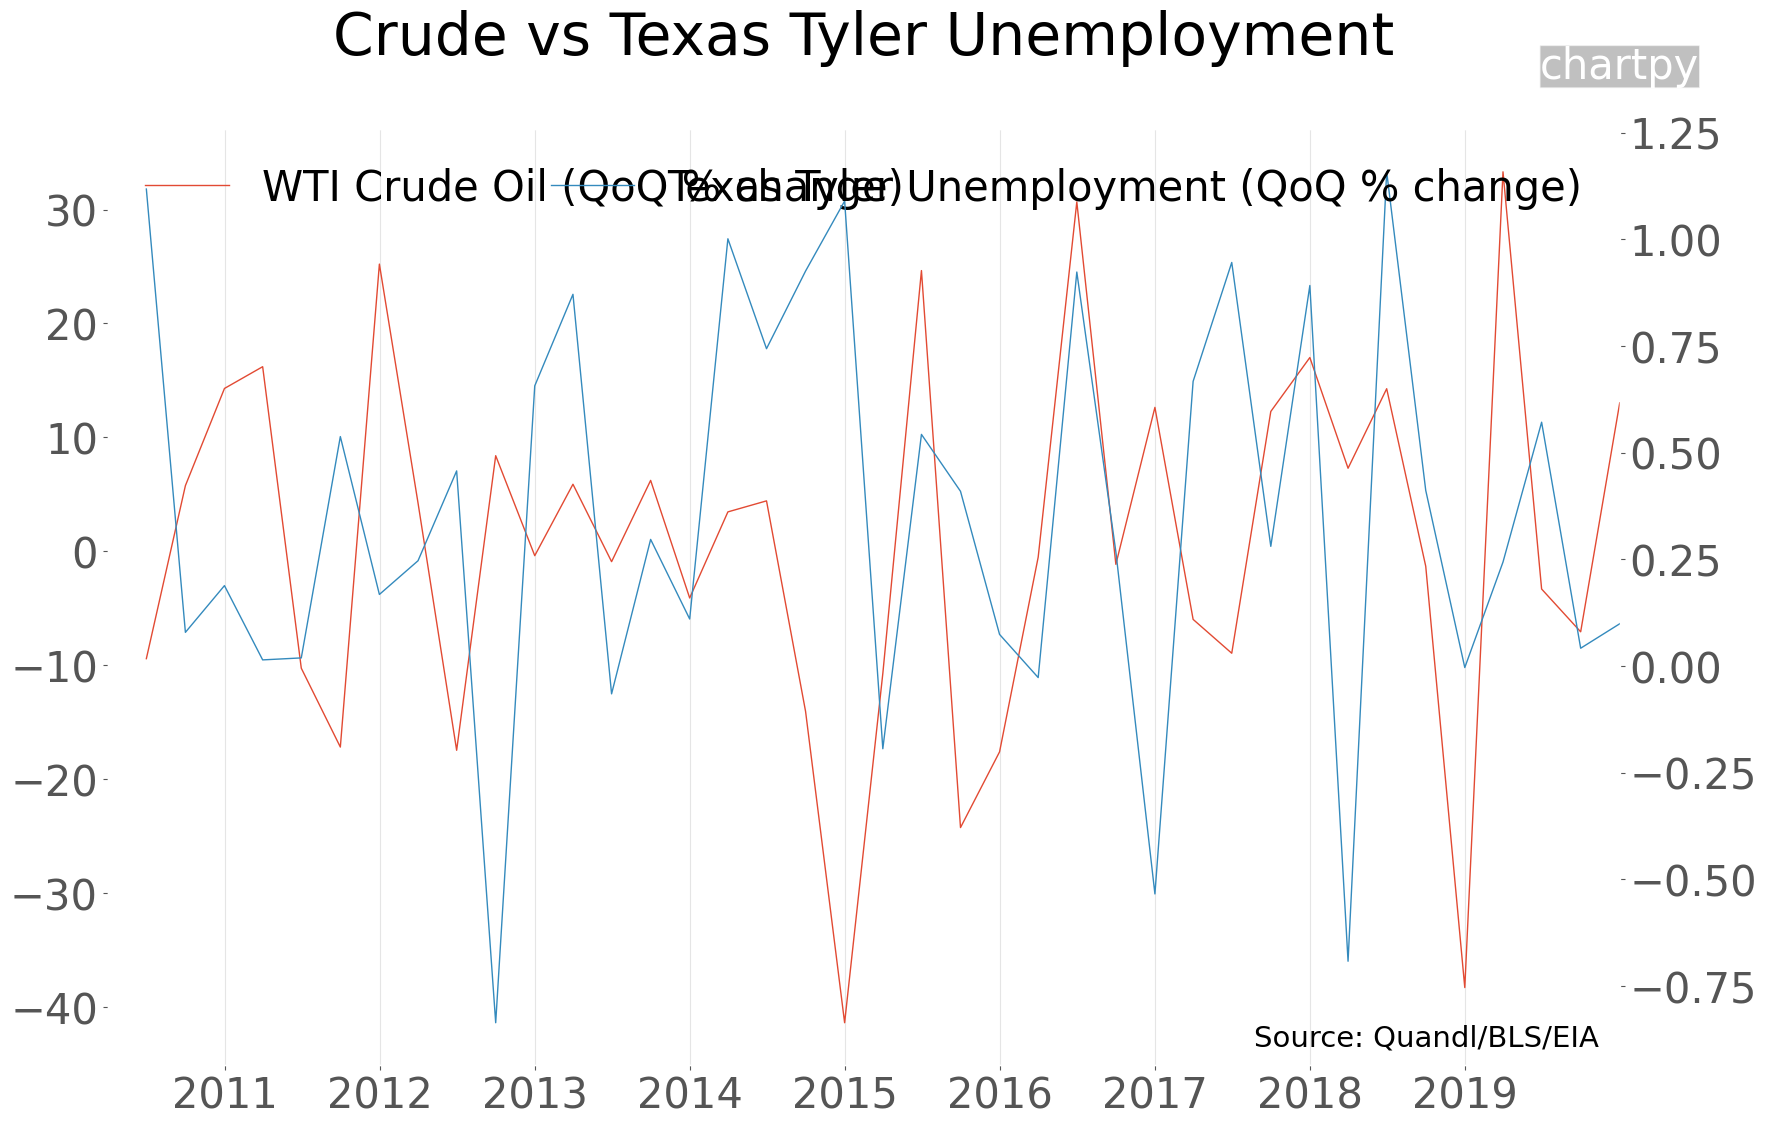

In [5]:
import quandl

quandl.ApiConfig.api_key = "G_kzspfG2nTnpPxJmy_P"

# Download data for WTI Crude oil from the EIA database on Quandl (US Department of Energy)
# We have looked up this ticker earlier on Quandl's website
df_wti = pd.DataFrame(quandl.get("FRED/DCOILWTICO", 
                                 start_date="2010-01-01", 
                                 end_date="2019-12-31"))

# Work out the quarter on quarter changes (need to resample the data first!)
df_wti.columns = ['WTI Crude Oil (QoQ % change)']
df_wti = df_wti.resample('Q').last()
df_wti = (df_wti / df_wti.shift(1) - 1) * 100

# Download Texas, Tyler county unemployment data from the FRED database on Quandl (Bureau of Labor Statistics)
df_une = pd.DataFrame(quandl.get("FRED/TYLSA175MFRBDAL", 
                                 start_date="2010-01-01", 
                                 end_date="2019-12-31"))
df_une.columns = ['Texas Tyler Unemployment (QoQ % change)']
df_une = df_une.resample('Q').last()
df_une = (df_une / df_une.shift(1) - 1) * 100

df = df_wti.join(df_une)

from chartpy import Style, Chart

# Use chartpy as it make it easier to use multiple y-axes!
style = Style(title='Crude vs Texas Tyler Unemployment', 
              y_axis_2_series='Texas Tyler Unemployment (QoQ % change)', 
              y_axis_showgrid=False, 
              y_axis_2_showgrid=False, 
              source='Quandl/BLS/EIA')
Chart(engine='matplotlib').plot(df, style=style)

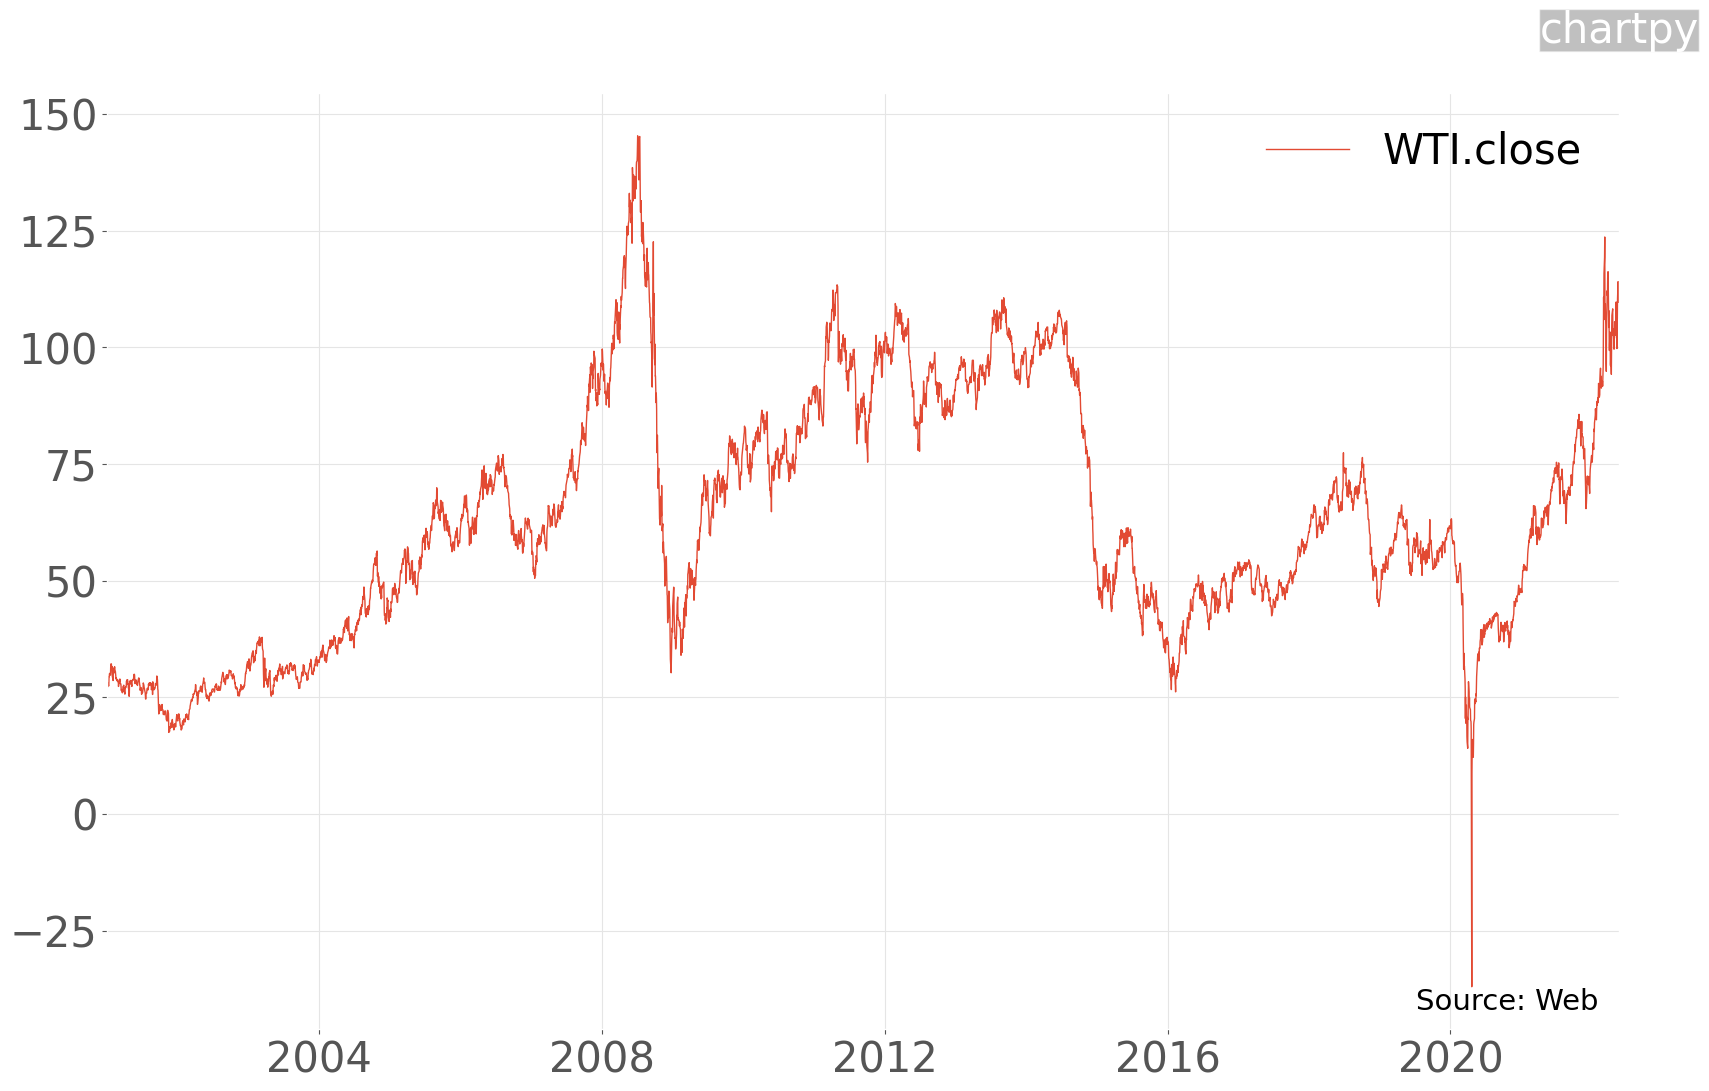

In [7]:
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator

md_request = MarketDataRequest(
    start_date='01 Jan 2001', # Start date
    # finish_date='12 Aug 2019', # Finish date
    tickers=['WTI'], # What we want the ticker to look like once download
    vendor_tickers=["FRED/DCOILWTICO"], # The ticker used by the vendor
    fields=['close'], # What fields we want (usually close, we can also define vendor fields)
    data_source='quandl', # What is the data source?
    quandl_api_key="G_kzspfG2nTnpPxJmy_P") # Most data sources will require us to specify an API key/password

market = Market(market_data_generator=MarketDataGenerator())

df_wti = market.fetch_market(md_request)

Chart(engine='matplotlib').plot(df_wti)

In [8]:
md_request = MarketDataRequest(
    start_date='01 Jan 2001', # Start date
    finish_date='12 Aug 2019', # Finish date
    tickers=['US GDP'], # What we want the ticker to look like once download
    vendor_tickers=["GDP"], # The ticker used by the vendor
    fields=['actual-release', 'first-revision', 'close'], # What fields we want
    data_source='alfred', # What is the data source?
    # vendor_fields=['actual-release', 'first-revision', 'close'],
    fred_api_key=FRED_API_KEY) # Most data sources will require us to specify an API key/password
    
df_fred_gdp = market.fetch_market(md_request)

Chart(engine='matplotlib').plot(df_fred_gdp, style=Style(source='ALFRED'))

NameError: name 'FRED_API_KEY' is not defined

In [ ]:
md_request = MarketDataRequest(
    start_date='01 Jan 2001', # Start date
    finish_date='12 Aug 2019', # Finish date
    tickers=['EURUSD'], # What we want the ticker to look like once download
    vendor_tickers=["DEXUSEU"], # The ticker used by the vendor
    fields=['close'], # What fields we want (usually close, we can also define vendor fields)
    data_source='alfred', # What is the data source?
    fred_api_key=FRED_API_KEY) # Most data sources will require us to specify an API key/password
    
df_fred_eurusd = market.fetch_market(md_request)

Chart(engine='matplotlib').plot(
    df_fred_eurusd, style=Style(source='ALFRED'))

In [ ]:
md_request = MarketDataRequest(
    start_date='01 Jan 2001', # Start date
    finish_date='01 May 2023', # Finish date
    tickers=['US 10Y-2Y'], # What we want the ticker to look like once download
    vendor_tickers=["T10Y2Y"], # The ticker used by the vendor
    fields=['close'], # What fields we want (usually close, we can also define vendor fields)
    data_source='alfred', # What is the data source?
    fred_api_key=FRED_API_KEY) # Most data sources will require us to specify an API key/password

market = Market(market_data_generator=MarketDataGenerator())
    
df_fred_yield_slope = market.fetch_market(md_request)

Chart(engine='matplotlib').plot(df_fred_yield_slope, 
                                style=Style(source='ALFRED'))

[*********************100%***********************]  2 of 2 completed


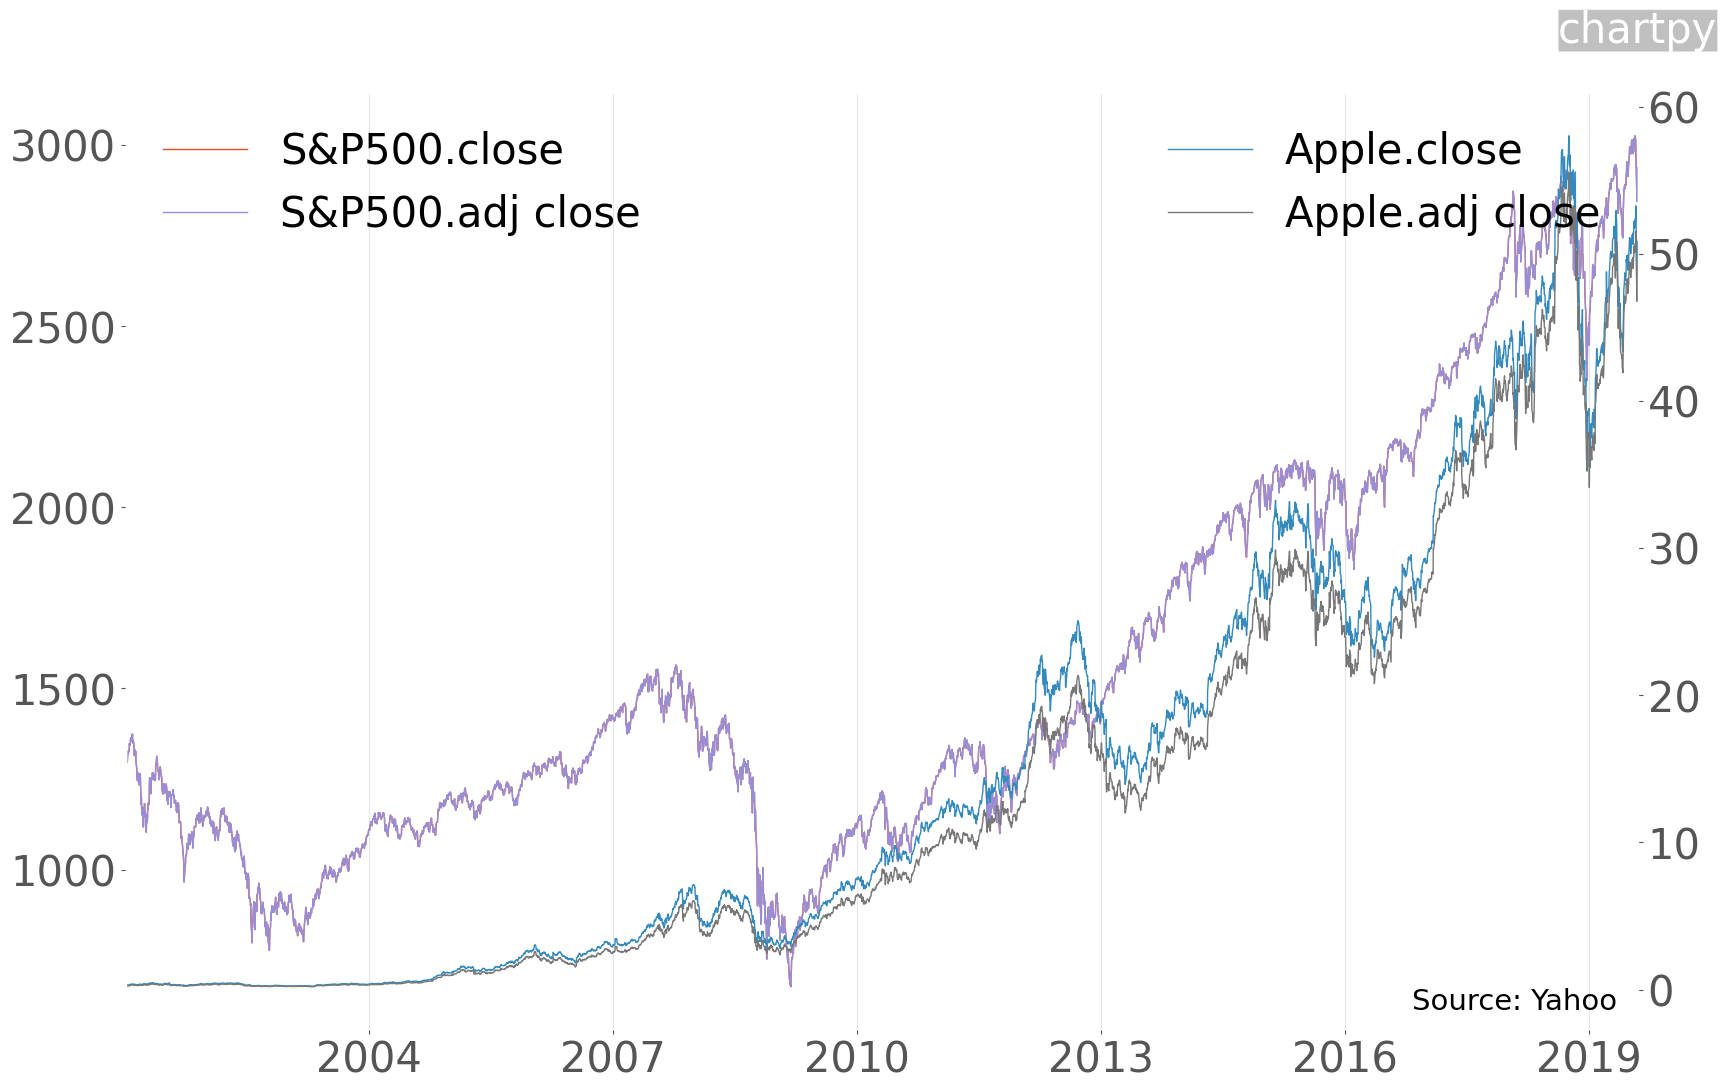

In [9]:
md_request = MarketDataRequest(
    start_date='01 Jan 2001', # Start date
    finish_date='12 Aug 2019', # Finish date
    tickers=['S&P500', 'Apple'], # What we want the ticker to look like once download
    vendor_tickers=["^GSPC", "aapl"], # The ticker used by the vendor
    fields=['close', 'adj close'], # What fields we want (usually close)
    vendor_fields=['close', 'adj close'],
    data_source='yahoo', # What is the data source?
)

market = Market(market_data_generator=MarketDataGenerator())
    
df_yahoo_stocks = market.fetch_market(md_request)

# let's plot using chartpy (with matplotlib as the back-end)
Chart(engine='matplotlib').plot(df_yahoo_stocks, style=Style(
    source='Yahoo', y_axis_2_series=['Apple.close', 'Apple.adj close'], 
    y_axis_showgrid=False, y_axis_2_showgrid=False))

In [12]:
import quandl

quandl.ApiConfig.api_key = "G_kzspfG2nTnpPxJmy_P"

df_wti_eur = pd.DataFrame(quandl.get(["FRED/DCOILWTICO",'FRED/DEXUSEU'], 
                        start_date="2000-01-01", end_date="2019-12-31"))
df_wti_eur.columns = ['WTI', 'EURUSD']
df_wti_eur = df_wti_eur.fillna(method='ffill')
df_wti_eur = df_wti_eur.dropna()

In [13]:
print(df_wti_eur.head(5))

              WTI  EURUSD
Date                     
2000-01-04  25.56  1.0309
2000-01-05  24.65  1.0335
2000-01-06  24.79  1.0324
2000-01-07  24.79  1.0294
2000-01-10  24.71  1.0252


In [14]:
df_wti_eur_rets = df_wti_eur / df_wti_eur.shift(1) - 1.0

<AxesSubplot: xlabel='Date'>

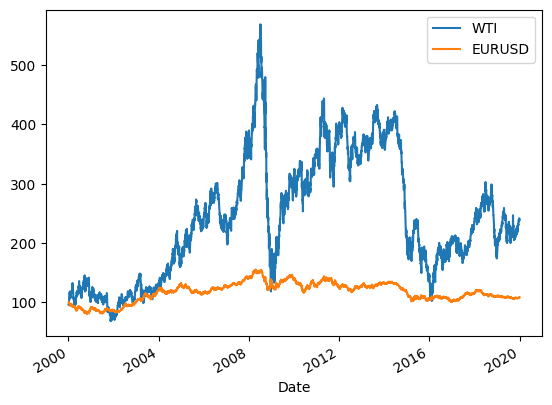

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('default') # changes the matplotlibplot style...

df_wti_eur_price_index = 100 * (1 + df_wti_eur_rets).cumprod()

df_wti_eur_price_index.plot()

In [16]:
import math

df_wti_eur_vol = df_wti_eur_rets.rolling(20, min_periods=1).std() * math.sqrt(252) * 100

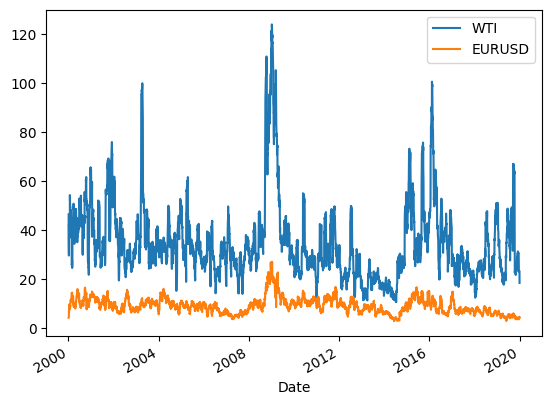

In [17]:
df_wti_eur_vol.plot();

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

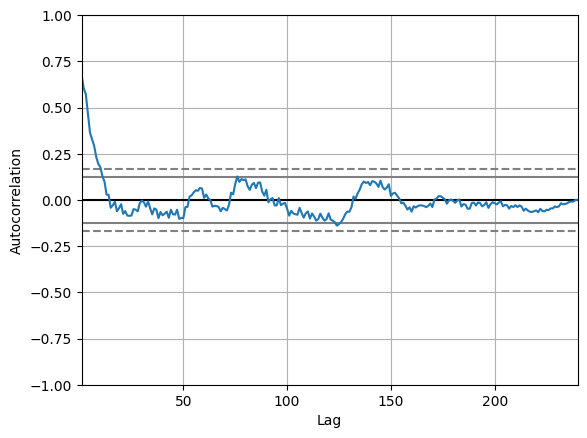

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_wti_eur_vol['EURUSD'].resample('BM').last())

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

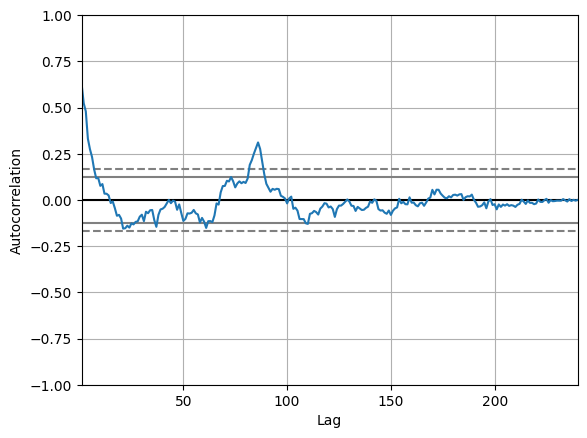

In [19]:
autocorrelation_plot(df_wti_eur_vol['WTI'].resample('BM').last())

4.1001186864658985


<AxesSubplot: xlabel='Date'>

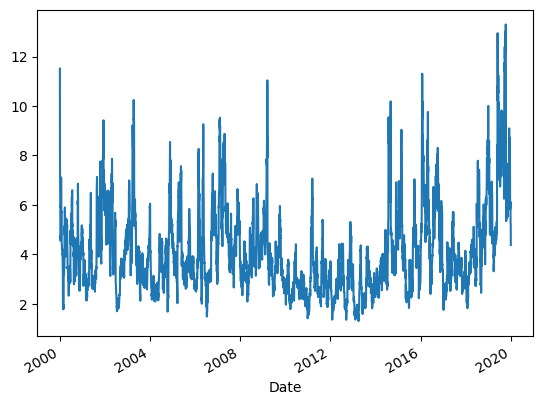

In [20]:
df_wti_eur_vol_ratio = df_wti_eur_vol['WTI'] / df_wti_eur_vol['EURUSD']
df_wti_eur_vol_mean_ratio = df_wti_eur_vol_ratio.mean()

print(df_wti_eur_vol_mean_ratio)
df_wti_eur_vol_ratio.plot()

<AxesSubplot: xlabel='Date'>

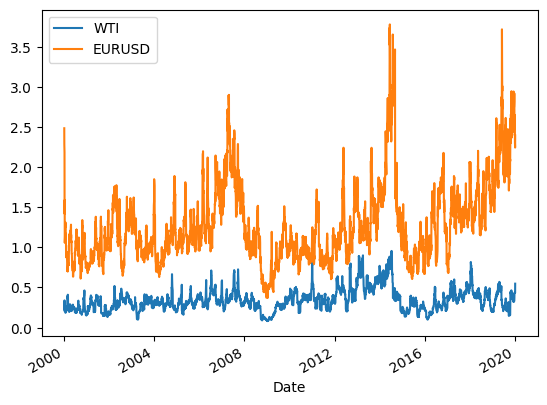

In [21]:
df_asset_leverage_daily = 10.0 / df_wti_eur_vol

df_asset_leverage_daily.plot()

<AxesSubplot: xlabel='Date'>

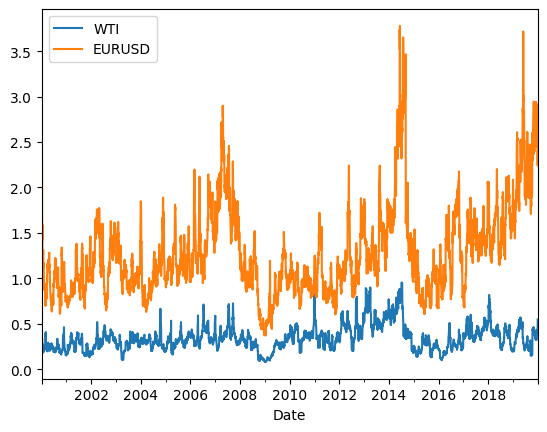

In [22]:
df_asset_leverage = df_asset_leverage_daily.resample('BM').last()
df_asset_leverage = df_asset_leverage_daily.resample('B').last().fillna(method='ffill')

df_asset_leverage.plot()

In [23]:
df_equal_notional_portfolio_rets = df_wti_eur_rets.mean(axis=1)
df_asset_vol_weighted_rets = (df_asset_leverage * df_wti_eur_rets).mean(axis=1)

df_equal_notional_portfolio = 100 * (1 + df_equal_notional_portfolio_rets).cumprod()
df_asset_vol_weighted_portfolio = 100 * (1 + df_asset_vol_weighted_rets).cumprod()

In [24]:
import pandas as pd

df_equal_notional_portfolio_index = pd.DataFrame(df_equal_notional_portfolio)
df_equal_notional_portfolio_index.columns = ['Equal notional']

df_asset_vol_weighted_portfolio_index = pd.DataFrame(df_asset_vol_weighted_portfolio)
df_asset_vol_weighted_portfolio_index.columns = ['Asset vol adjusted notional']

df_index = df_equal_notional_portfolio_index.join(df_asset_vol_weighted_portfolio_index)

In [25]:
df_index_rets = df_index / df_index.shift(1) - 1

ann_vol = df_index_rets.std(axis=0) * math.sqrt(252)

print(ann_vol * 100.0)

Equal notional                 20.459255
Asset vol adjusted notional     7.628394
dtype: float64


<AxesSubplot: xlabel='Date'>

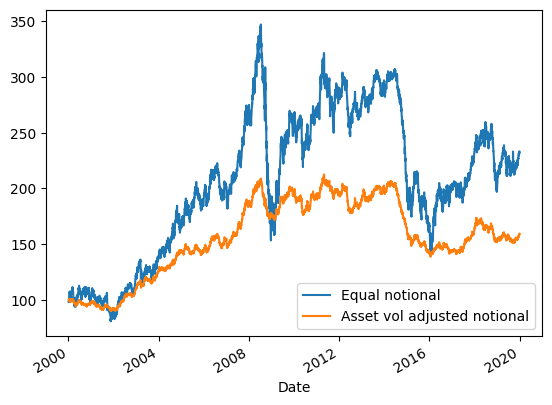

In [26]:
df_index.plot()

### Backtesting

In [29]:
import quandl

# We should have set the Quandl API key earlier! Remember to change this to your key
quandl.ApiConfig.api_key = QUANDL_API_KEY

# Use Quandl or get from GitHub
use_quandl = True
# use_quandl = False # Uncomment if you don't have Quandl API key

if use_quandl:
    # Read from Quandl data service (may take time to download)
    fx_df = pd.DataFrame(quandl.get('FRED/DEXUSEU', start_date="1999-01-01"))
    fx_df.columns = ['EURUSD.close']

    fx_df.to_csv(raw_data_path + 'EURUSD.csv') # Save to disk in case want to read back later
else:
    # Read from GitHub
    fx_df = pd.read_csv(
        "https://raw.githubusercontent.com/cuemacro/teaching/" + \
        "master/pythoncourse/data/EURUSD.csv",
        index_col=0)
    
    fx_df.index = pd.to_datetime(fx_df.index)
    
print(fx_df.head(5))

            EURUSD.close
Date                    
1999-01-04        1.1812
1999-01-05        1.1760
1999-01-06        1.1636
1999-01-07        1.1672
1999-01-08        1.1554


In [30]:
tc = 2.0 / (2.0 * 100.0 * 100.0) # 2 bp bid/ask transaction costs

# Calculate the simple moving average and then trading signal
# Note: for the initial part of the sample the trading signal
# will be NaN and undefined
fx_sma_df = fx_df.rolling(200, min_periods=1).mean()
fx_signal = np.where(fx_df > fx_sma_df, 1.0, -1.0)   
fx_signal_df = pd.DataFrame(
    index=fx_df.index, data=fx_signal, columns=fx_df.columns)

In [31]:
fx_ret_df = fx_df / fx_df.shift(1) - 1.0

In [32]:
# The strategy returns are simply the previous days signal multiplied by returns between 
# that day and the next
fx_strat_ret_df = fx_signal_df.shift(1) * fx_ret_df \
    - abs(fx_signal_df - fx_signal_df.shift(1)) * tc

In [33]:
import math

ann_factor = 252

ann_ret = fx_strat_ret_df.mean(axis=0) * ann_factor
ann_vol = fx_strat_ret_df.std(axis=0) * math.sqrt(ann_factor)
info_ratio = ann_ret / ann_vol

print("Ret = " + str(round(ann_ret[0] * 100,1)) + "%")
print("Vol = " + str(round(ann_vol[0] * 100,1)) + "%")
print("IR = " + str(round(ann_ret[0]/ann_vol[0],1)))

Ret = 3.3%
Vol = 9.4%
IR = 0.4


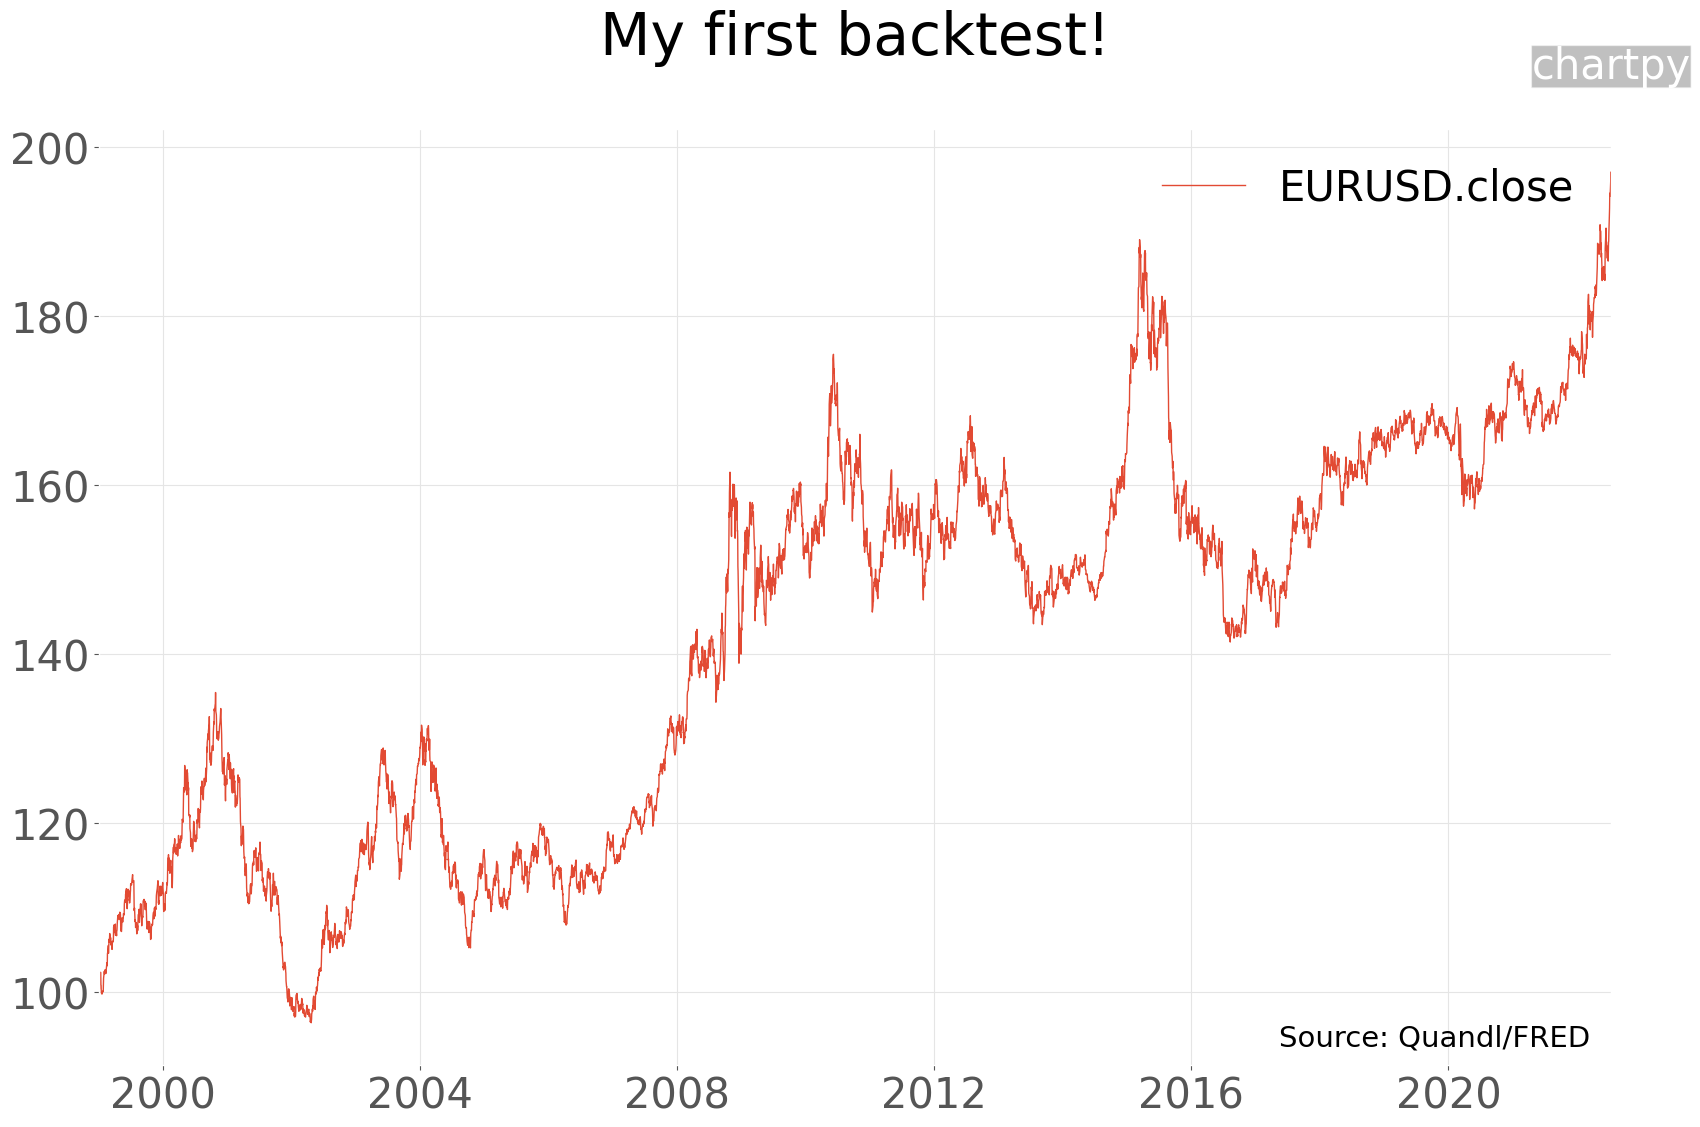

In [34]:
fx_cum_strat_ret = 100.0 * (1.0 + fx_strat_ret_df).cumprod()

Chart(engine='matplotlib').plot(fx_cum_strat_ret, 
    style=Style(title='My first backtest!', source='Quandl/FRED'));

In [36]:
import datetime

from finmarketpy.backtest import Backtest, BacktestRequest
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator
from findatapy.util.fxconv import FXConv
from findatapy.timeseries import Calculations

# For logging
from findatapy.util import LoggerManager

# For signal generation
from finmarketpy.economics import TechIndicator, TechParams

# For plotting
from chartpy import Chart, Style

backtest = Backtest()
br = BacktestRequest()

In [37]:
# Set all the parameters
br.start_date = "02 Jan 1999"
br.finish_date = datetime.datetime.utcnow()
br.spot_tc_bp = 2.5  # 2.5 bps bid/ask spread
br.ann_factor = 252

tech_params = TechParams()
tech_params.sma_period = 200
indicator = 'SMA'

In [38]:
use_quandl = True
# use_quandl = False # Uncomment this if you don't have Quandl API key

# Pick EUR/USD
# Note: we are calculating returns from spot
# it is much better to use to total return indices for FX, which include carry
md_request = MarketDataRequest(
    start_date="01 Jan 1999",  # Start date
    finish_date=datetime.date.today(),  # Finish date
    freq='daily',  # Daily data
    data_source='quandl',  # Use Quandl as data source
    tickers=['EURUSD'],  # Ticker (findatapy)
    fields=['close'],  # Which fields to download
    vendor_tickers=['FRED/DEXUSEU'],  # Ticker (Quandl)
    vendor_fields=['close'],  # Which Bloomberg fields to download
    quandl_api_key=QUANDL_API_KEY)  # How to return data

market = Market(market_data_generator=MarketDataGenerator())

if use_quandl:
    asset_df = market.fetch_market(md_request)
else:
    asset_df = pd.read_csv(
        "https://raw.githubusercontent.com/cuemacro/" + \
        "teaching/master/pythoncourse/data/EURUSD.csv",
    index_col=0)
    
    # Convert the objects in index column to dates
    asset_df.index = pd.to_datetime(fx_df.index)
    
spot_df = asset_df

In [39]:
# Use technical indicator to create signals
# (we could obviously create whatever function we wanted for generating the signal dataframe)
# However, finmarketpy has some technical indicators built in (and some signals too)
tech_ind = TechIndicator()
tech_ind.create_tech_ind(spot_df, indicator, tech_params);
signal_df = tech_ind.get_signal()

# use the same data for generating signals
backtest.calculate_trading_PnL(br, asset_df, signal_df, None, False)

            EURUSD.close SMA Signal
Date                               
2022-07-01                     -1.0
2022-07-05                     -1.0
2022-07-06                     -1.0
2022-07-07                     -1.0
2022-07-08                     -1.0
2022-07-11                     -1.0
2022-07-12                     -1.0
2022-07-13                     -1.0
2022-07-14                     -1.0
2022-07-15                     -1.0


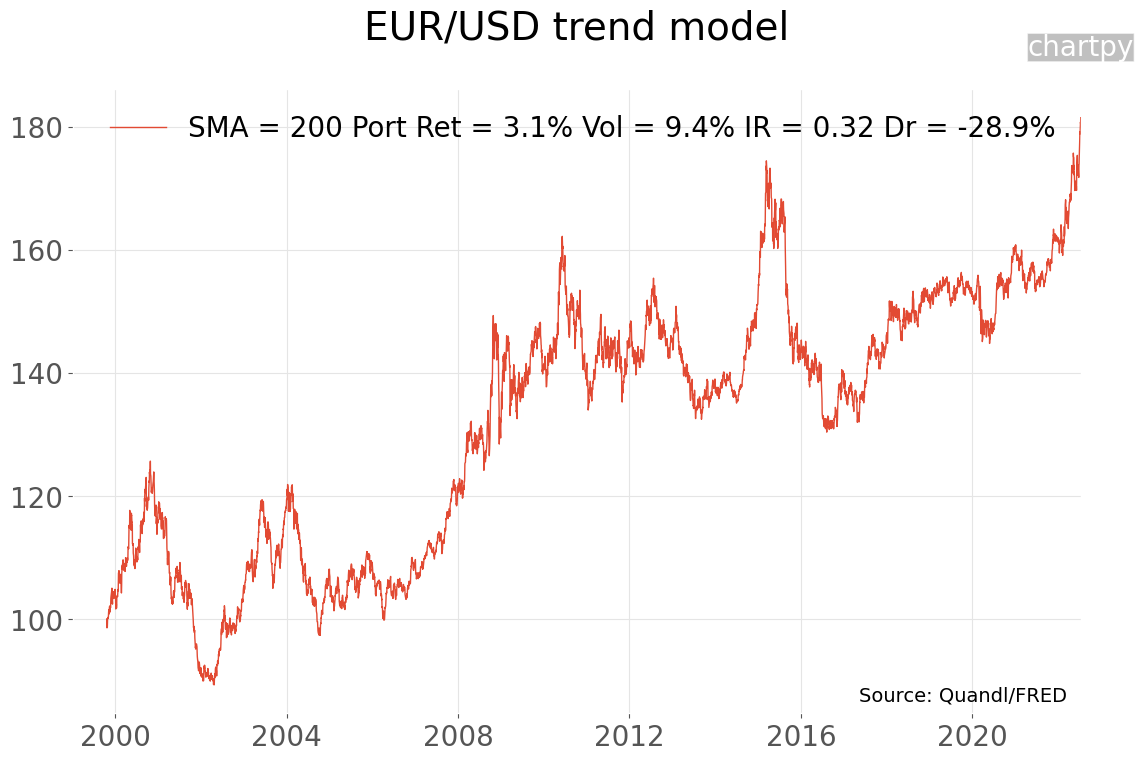

In [40]:
# Get the returns and signals for the portfolio
port = backtest.portfolio_cum() # cumulative returns index
port.columns = [indicator + ' = ' + str(tech_params.sma_period) + ' ' + str(backtest.portfolio_pnl_desc()[0])]
signals = backtest.portfolio_signal()  # get final signals for each series
returns = backtest.pnl()  # get daily P&L for each series

# Print the last few positions (we could also save as CSV etc.)
print(signals.tail(10))

style = Style(title="EUR/USD trend model", source="Quandl/FRED", scale_factor=2)

Chart(port, style=style).plot()

In [41]:
import datetime

from findatapy.market import Market, MarketDataGenerator, MarketDataRequest
from finmarketpy.backtest import TradingModel, BacktestRequest
from finmarketpy.economics import TechIndicator

from chartpy import Style

class TradingModelFXTrend_Example(TradingModel):

    def __init__(self):
        super(TradingModel, self).__init__()

        ##### FILL IN WITH YOUR OWN PARAMETERS FOR display, dumping, TSF etc.
        self.market = Market(market_data_generator=MarketDataGenerator())
        
        # Where do you want to dump any output (like charts etc?) you might need to make this folder!
        self.DUMP_PATH = 'output_data/' 
        self.FINAL_STRATEGY = 'FXTrend' # name the trading strategy
        self.SCALE_FACTOR = 1.5 # size of the charts
        
        # What plotting engine to use for charts (eg. matplotlib, plotly etc.)
        self.DEFAULT_PLOT_ENGINE = 'matplotlib' 
        # self.CHART_STYLE = Style(plotly_plot_mode='offline_jupyter')

        self.br = self.load_parameters()
        
        return

In [42]:
    ###### Parameters and signal generations (need to be customised for every model)
    def load_parameters(self, br = None):

        if br is not None: return br

        ##### FILL IN WITH YOUR OWN BACKTESTING PARAMETERS
        br = BacktestRequest()

        # Get all asset data
        br.start_date = "04 Jan 1989"
        br.finish_date = datetime.datetime.utcnow().date()
        br.spot_tc_bp = 0.5 # How much transaction costs should we include?
        br.ann_factor = 252 # How many periods in the year (252 business days)
        
        # How do we want some of plots to be done? calculate return statistics?
        # Do we want to compare against a benchmark?
        br.plot_start = "01 Jan 1989"
        br.calc_stats = True
        br.write_csv = False
        br.plot_interim = True
        br.include_benchmark = True

        # Have vol target for each signal?
        # Higher volatility assets will have a smaller notional
        # Lower volatility assets will have a larger notional
        # the idea is we have the same amount of "risk" in each
        br.signal_vol_adjust = True
        br.signal_vol_target = 0.1 # Vol target is 10% annualised
        br.signal_vol_max_leverage = 5 # Max leverage we can have is 5x per signal
        br.signal_vol_periods = 20 # When calculating realised vol, use a 20D window
        br.signal_vol_obs_in_year = 252 # There are 252 business days in a year
        br.signal_vol_rebalance_freq = 'BM' # Rebalance the leverage at every month end
        br.signal_vol_resample_freq = None

        # Have vol target for portfolio
        # Make sure the portfolio has the leverage adjusted using vol of returns
        # This should hopefully smooth our returns over time
        br.portfolio_vol_adjust = True
        br.portfolio_vol_target = 0.1
        br.portfolio_vol_max_leverage = 5
        br.portfolio_vol_periods = 20
        br.portfolio_vol_obs_in_year = 252
        br.portfolio_vol_rebalance_freq = 'BM'
        br.portfolio_vol_resample_freq = None

        # Tech params
        br.tech_params.sma_period = 200

        return br

In [43]:
    def load_assets(self, br=None):
        
        use_quandl = True
        # use_quandl = False # Uncomment if you don't have a Quandl API Key
        
        ##### FILL IN WITH YOUR ASSET DATA
        from findatapy.util.loggermanager import  LoggerManager
        logger = LoggerManager().getLogger(__name__)

        # for FX basket
        full_bkt = ['EURUSD', 'USDJPY', 'GBPUSD', 'AUDUSD', 
                    'USDCAD', 'NZDUSD', 'USDCHF', 'USDNOK', 'USDSEK']

        basket_dict = {}

        # We want to calculate returns for each individual asset
        for i in range(0, len(full_bkt)):
            basket_dict[full_bkt[i]] = [full_bkt[i]]
        
        # Create a basket including all currency pairs
        basket_dict['FXTrend'] = full_bkt
        
        # Get the parameters for backtest
        br = self.load_parameters(br=br)

        logger.info("Loading asset data...")
        
        # Vendor tickers for Quandl for the above currency pairs
        vendor_tickers = ['FRED/DEXUSEU', 'FRED/DEXJPUS', 'FRED/DEXUSUK', 'FRED/DEXUSAL', 
                          'FRED/DEXCAUS', 'FRED/DEXUSNZ', 'FRED/DEXSZUS', 'FRED/DEXNOUS', 
                          'FRED/DEXSDUS']

        market_data_request = MarketDataRequest(
                    start_date = br.start_date,             # Start date
                    finish_date = br.finish_date,           # Finish date
                    freq = 'daily',                         # Daily data
                    data_source = 'quandl',                 # Use Quandl as data source
                    tickers = full_bkt,                     # Ticker (Cuemacro)
                    fields = ['close'],                     # Which fields to download
                    vendor_tickers = vendor_tickers,        # Ticker (Quandl)
                    vendor_fields = ['close'],              # Which vendor fields to download
                    quandl_api_key=QUANDL_API_KEY)          # API key
        
        if use_quandl:
            asset_df = self.market.fetch_market(market_data_request)
            asset_df.to_csv(raw_data_path + 'daily_fx_spot_data.csv')
        else:
            import pandas
            
            url = "https://raw.githubusercontent.com/cuemacro/teaching/master/" + \
                "pythoncourse/data/daily_fx_spot_data.csv"
            asset_df = pandas.read_csv(
                url, index_col=0, parse_dates=['Date'],
                date_parser = lambda x: pandas.datetime.strptime(x, '%Y-%m-%d'))

        # Signalling variables also use the same time series
        # Note, we could have a different dataset to construct the signal
        # eg. interest rates, economic data, not necessarily FX data
        spot_df = asset_df
        spot_df2 = None
         
        # These DataFrames will be used later
        
        # asset_df - used to calculate asset returns later
        # spot_df & spot_df2 - used by construct_signal
        return asset_df, spot_df, spot_df2, basket_dict

In [44]:
    def construct_signal(self, spot_df, spot_df2, tech_params, br, run_in_parallel=False):

        ##### FILL IN WITH YOUR OWN SIGNALS

        # Use technical indicator to create signals
        # We could obviously create whatever function we wanted 
        # For generating the signal dataframe
        tech_ind = TechIndicator()
        tech_ind.create_tech_ind(spot_df, 'SMA', tech_params);
        signal_df = tech_ind.get_signal()

        return signal_df

In [45]:
     def construct_strategy_benchmark(self):

        ###### FILL IN WITH YOUR OWN BENCHMARK
        tsr_indices = MarketDataRequest(
            start_date = self.br.start_date,    # Start date
            finish_date = self.br.finish_date,  # Finish date
            freq = 'daily',                     # Daily data
            data_source = 'quandl',             # Use Quandl as data source
            tickers = ["EURUSD"],               # Tickers to download
            vendor_tickers=['FRED/DEXUSEU'],
            fields = ['close'],                 # Which fields to download
            vendor_fields = ['close'],
            quandl_api_key=QUANDL_API_KEY)      # API key

        df = self.market.fetch_market(tsr_indices)

        df.columns = [x.split(".")[0] for x in df.columns]

        return df

In [46]:
TradingModelFXTrend_Example.load_parameters = load_parameters
TradingModelFXTrend_Example.load_assets = load_assets
TradingModelFXTrend_Example.construct_signal = construct_signal
TradingModelFXTrend_Example.construct_strategy_benchmark = construct_strategy_benchmark

In [47]:
model = TradingModelFXTrend_Example()

model.construct_strategy()

[Errno 2] No such file or directory: 'output_data/FXTrend (Strategy PnL) 1.5.png'


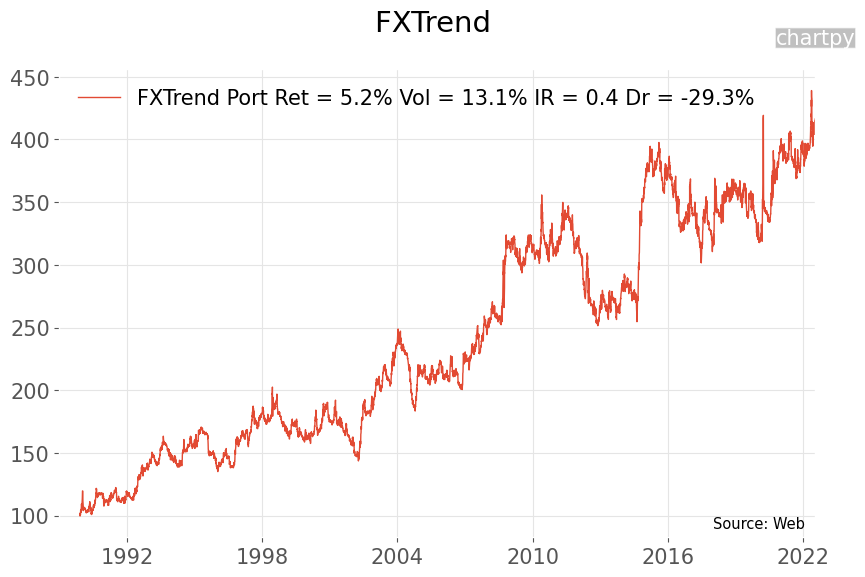

In [48]:
model.plot_strategy_pnl()

[Errno 2] No such file or directory: 'output_data/FXTrend (Strategy Leverage) 1.5.png'


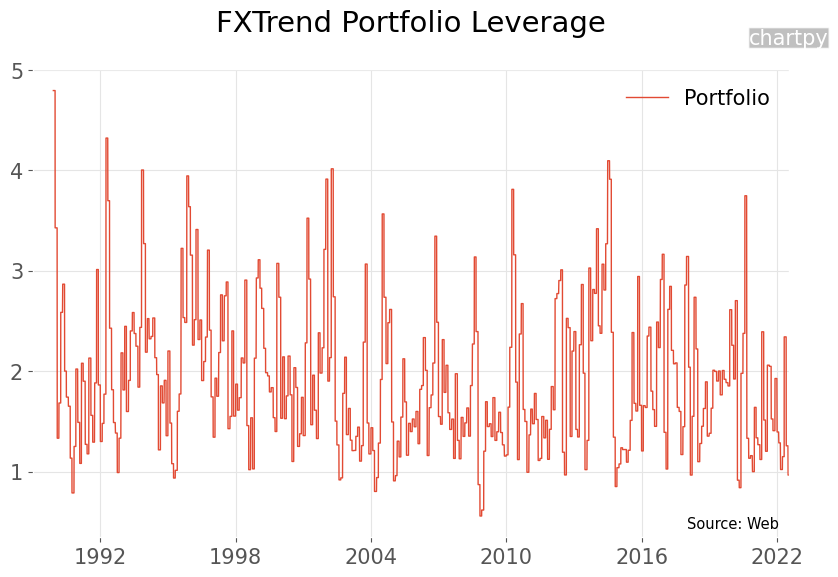

In [49]:
model.plot_strategy_leverage();

[Errno 2] No such file or directory: 'output_data/FXTrend (Individual Trade PnL) 1.5.png'


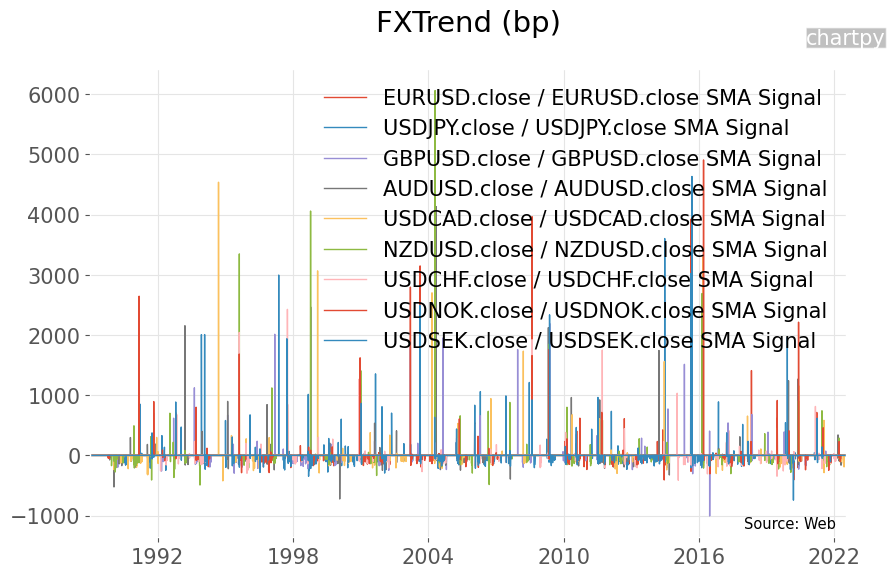

In [50]:
model.plot_strategy_group_pnl_trades();

[Errno 2] No such file or directory: 'output_data/FXTrend (Group Benchmark PnL - cumulative) 1.5.png'


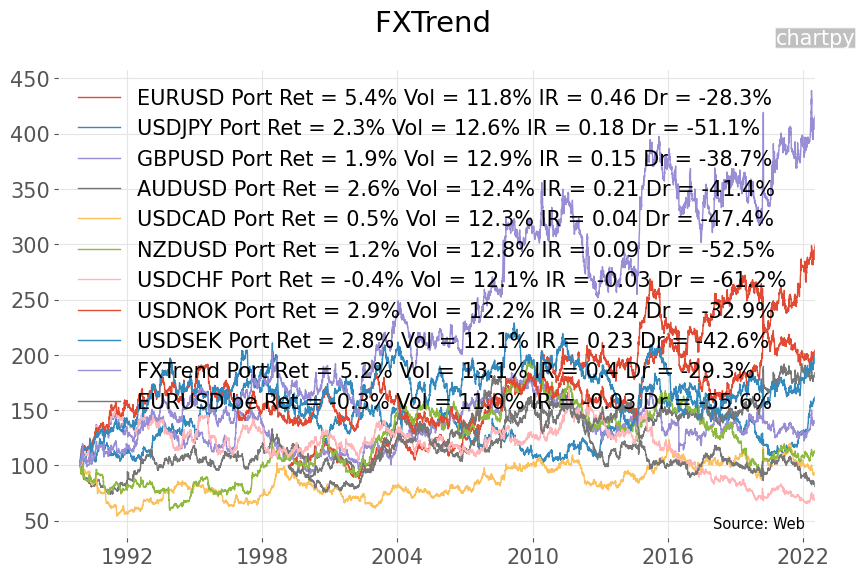

In [51]:
model.plot_strategy_group_benchmark_pnl();

[Errno 2] No such file or directory: 'output_data/FXTrend (Group Benchmark IR) 1.5.png'


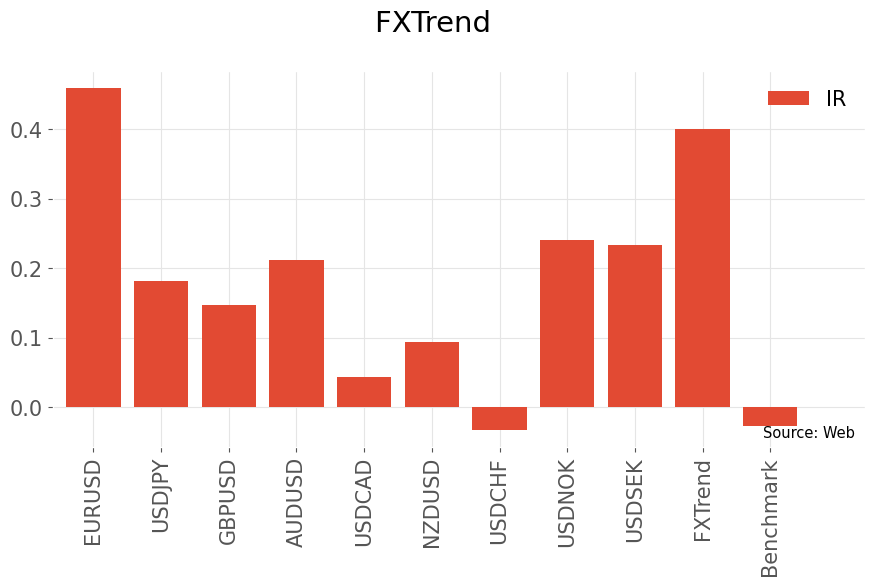

In [52]:
model.plot_strategy_group_benchmark_pnl_ir();

In [53]:
from finmarketpy.backtest import TradeAnalysis

ta = TradeAnalysis()

ta.run_strategy_returns_stats(model, engine='finmarketpy')

[Errno 2] No such file or directory: 'output_data/FXTrend (Strategy PnL) 0.75.png'
[Errno 2] No such file or directory: 'output_data/FXTrend (Individual Trade PnL) 0.75.png'
[Errno 2] No such file or directory: 'output_data/FXTrend (Group Benchmark PnL - cumulative) 0.75.png'
[Errno 2] No such file or directory: 'output_data/FXTrend (Group Benchmark IR) 0.75.png'
[Errno 2] No such file or directory: 'output_data/FXTrend (Strategy Leverage) 0.75.png'
[Errno 2] No such file or directory: 'output_data/FXTrend (Group Leverage) 0.75.png'


[Errno 2] No such file or directory: 'output_data/20231112 FXTrend vol target.png'


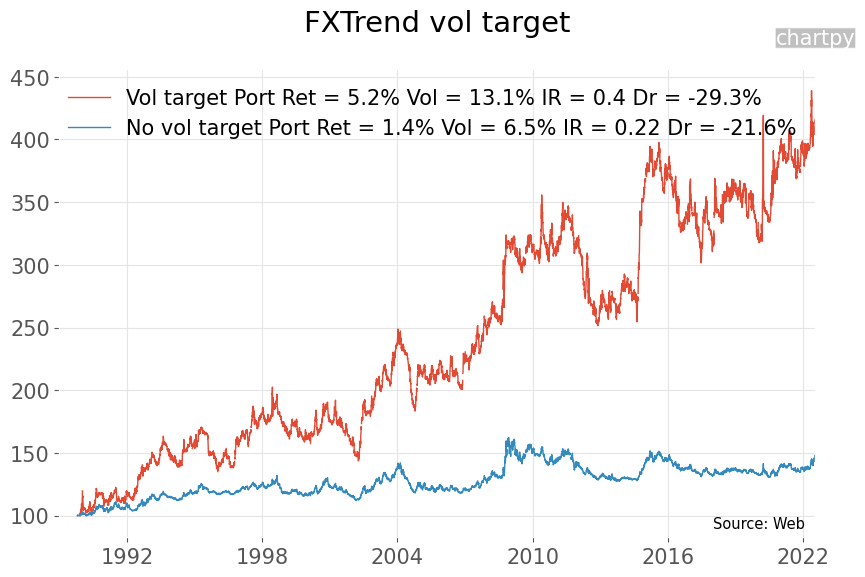

[Errno 2] No such file or directory: 'output_data/20231112 FXTrend vol target IR.png'


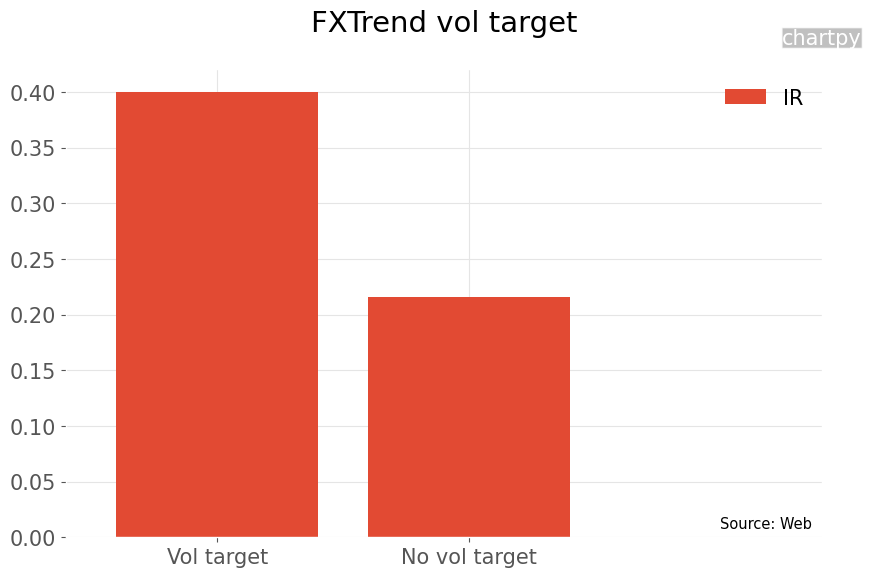

[Errno 2] No such file or directory: 'output_data/20231112 FXTrend vol target Rets.png'


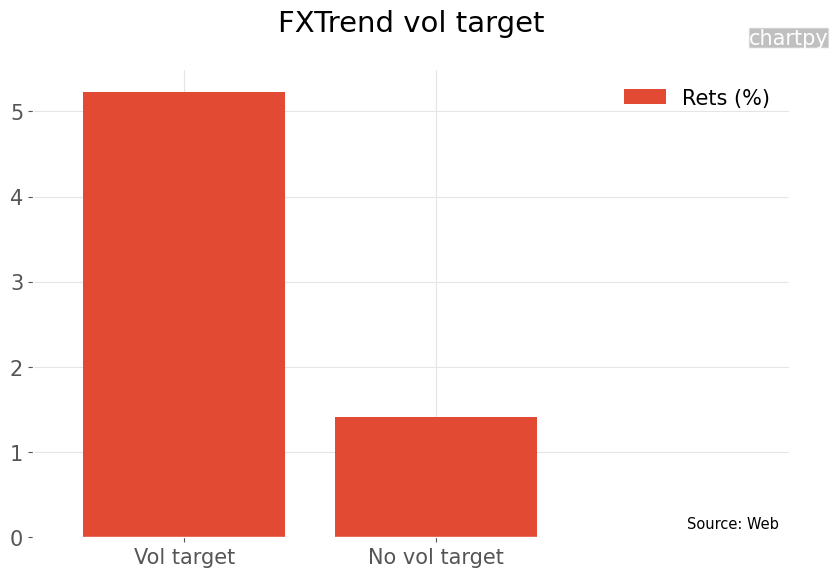

In [54]:
parameter_list = [
            {'portfolio_vol_adjust': True, 'signal_vol_adjust' : True},
            {'portfolio_vol_adjust': False, 'signal_vol_adjust' : False}]

pretty_portfolio_names = \
            ['Vol target',
             'No vol target']

parameter_type = 'vol target'

ta.run_arbitrary_sensitivity(model,
    parameter_list=parameter_list,
    pretty_portfolio_names=pretty_portfolio_names,
    parameter_type=parameter_type);

[Errno 2] No such file or directory: 'output_data/20231112 FXTrend TC analysis.png'


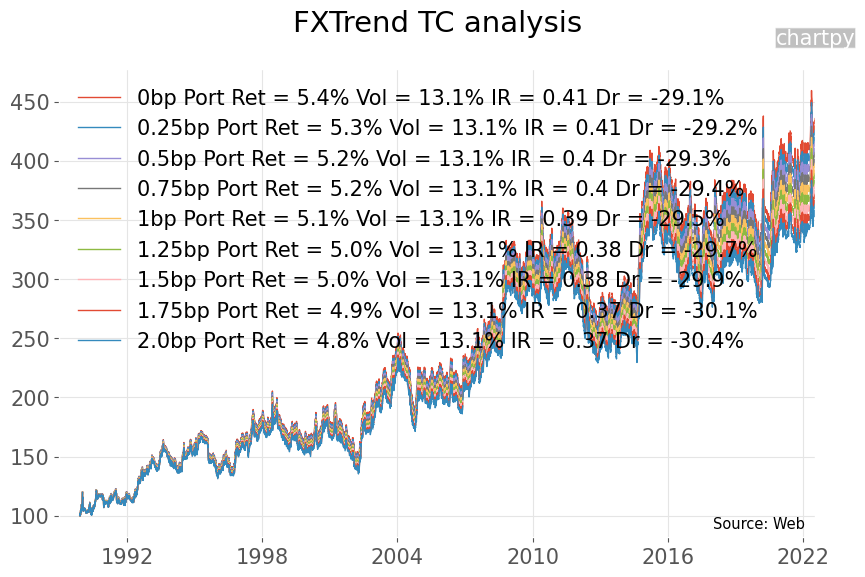

[Errno 2] No such file or directory: 'output_data/20231112 FXTrend TC analysis IR.png'


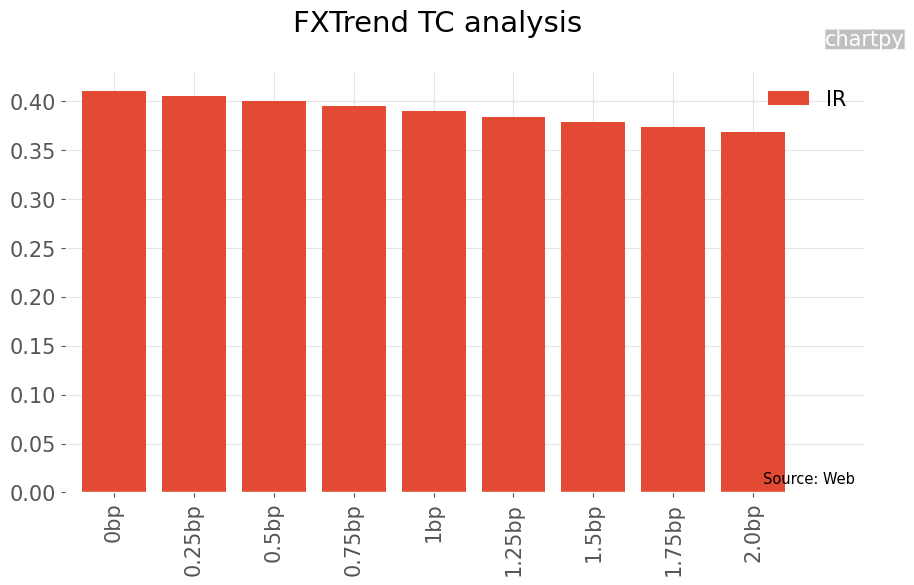

[Errno 2] No such file or directory: 'output_data/20231112 FXTrend TC analysis Rets.png'


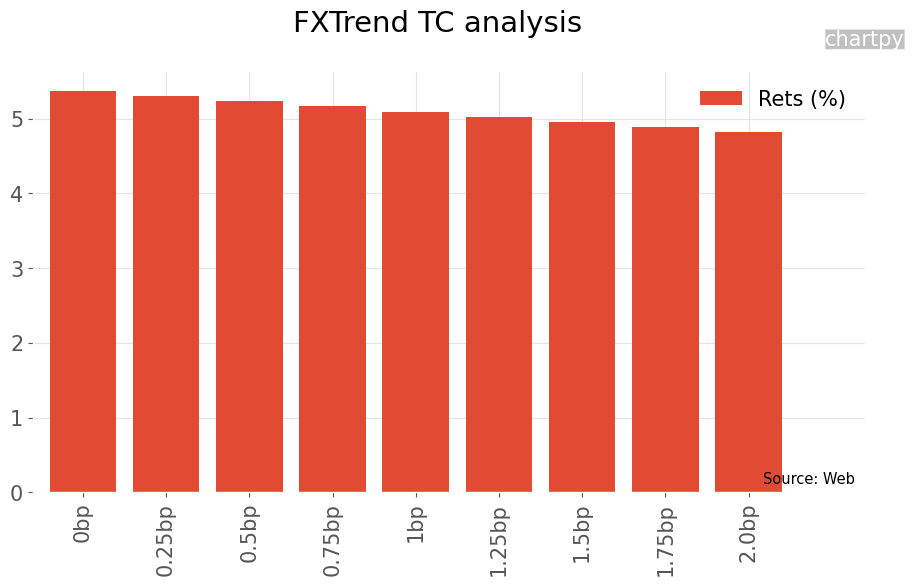

In [55]:
tc = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0]
ta.run_tc_shock(model, tc=tc);